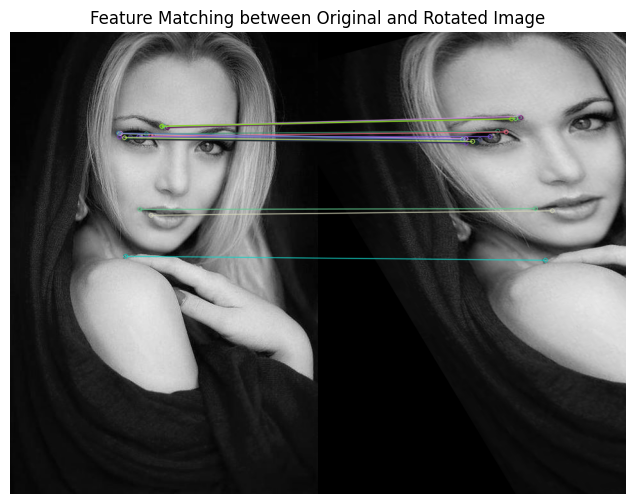

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load an image of your face
image_path = "abc.jpg"  # Replace with your image path
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Rotate the image using affine transformation
rows, cols = original_image.shape[:2]
src_points = np.float32([[50, 50], [200, 50], [50, 200]])  # Points in the original image
dst_points = np.float32([[10, 100], [200, 50], [100, 250]])  # Points in the transformed image
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
rotated_image = cv2.warpAffine(original_image, affine_matrix, (cols, rows))

# Step 3: Detect features using ORB
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(original_image, None)
keypoints2, descriptors2 = orb.detectAndCompute(rotated_image, None)

# Step 4: Match features using Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

# Step 5: Draw the top matches
matched_image = cv2.drawMatches(
    original_image, keypoints1, rotated_image, keypoints2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Step 6: Display the result
plt.figure(figsize=(10, 6))
plt.imshow(matched_image, cmap="gray")
plt.title("Feature Matching between Original and Rotated Image")
plt.axis("off")
plt.show()

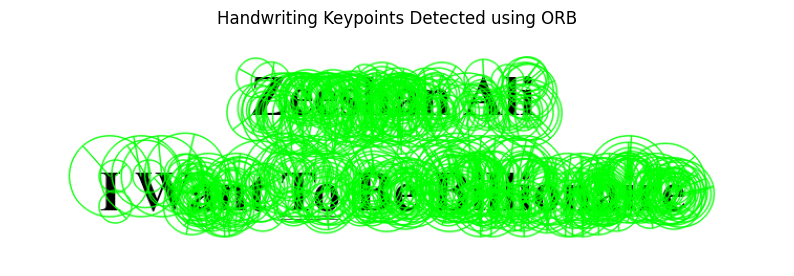

In [5]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the handwritten image
image_path = "handwriting.png"  # Replace with the path to your image
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Initialize ORB detector
orb = cv2.ORB_create(nfeatures=500)  # You can increase/decrease the number of features

# Step 3: Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Step 4: Visualize keypoints
image_with_keypoints = cv2.drawKeypoints(
    gray_image,
    keypoints,
    None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
    color=(0, 255, 0)
)

# Step 5: Display the result
plt.figure(figsize=(10, 6))
plt.title("Handwriting Keypoints Detected using ORB")
plt.imshow(image_with_keypoints, cmap="gray")
plt.axis("off")
plt.show()